### Installing Libraries

In [186]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
!pip install plotly==5.14.1
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
# Importing Libraries
import nltk
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC,LinearSVC
from sklearn.svm import SVR,LinearSVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import pickle

In [189]:
# Downloading packages from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Reading the .csv data

In [314]:
# Reading the data and storing it in the dataframes
agg_df = pd.read_csv("data/aggression_parsed_dataset.csv")
att_df = pd.read_csv("data/attack_parsed_dataset.csv")
tox_df = pd.read_csv("data/toxicity_parsed_dataset.csv")
rac_df = pd.read_csv("data/twitter_racism_parsed_dataset.csv")
sex_df = pd.read_csv("data/twitter_sexism_parsed_dataset.csv")

### Viewing the dataframes

In [315]:
agg_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


#### 'oh_label' = 0 -> Not aggressive; 'oh_label' = 1 -> aggressive; ed_label_0 -> Probability of Not Aggressive; ed_label_1 -> Probability of Aggressive;

In [316]:
att_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,1.000000,0.000000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


#### 'oh_label' = 0 -> Not attack; 'oh_label' = 1 -> attack; ed_label_0 -> Probability of Not attack; ed_label_1 -> Probability of attack;

In [317]:
tox_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


#### 'oh_label' = 0 -> Not toxic; 'oh_label' = 1 -> toxic; ed_label_0 -> Probability of Not toxic; ed_label_1 -> Probability of toxic;

In [318]:
rac_df.head()

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0


#### 'oh_label' = 0 -> Not racist; 'oh_label' = 1 -> racist; 

In [319]:
sex_df.head()

,index,id,Text,Annotation,oh_label
0,5.35198627292254E+017,5.35198627292254E+017,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism,1.0
1,5.75984924030714E+017,5.75984924030714E+017,There's some very hate able teams this year #MKR,none,0.0
2,5.7233536016588E+017,5.7233536016588E+017,"RT @The_Eccles: ""Everyone underestimated us"" \...",none,0.0
3,5.72337925708374E+017,5.72337925708374E+017,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none,0.0
4,4.43033024528011E+017,4.43033024528011E+017,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism,1.0


#### 'oh_label' = 0 -> Not sexist; 'oh_label' = 1 -> sexist; 

### Checking for missing values

In [320]:
# Printing the count of null values of dataframe
print("The no. of Null values in aggression database:",agg_df.isnull().sum())
print("The no. of Null values in attack database:",att_df.isnull().sum())
print("The no. of Null values in toxicity database:",tox_df.isnull().sum())
print("The no. of Null values in racism database:",rac_df.isnull().sum())
print("The no. of Null values in sexism database:",sex_df.isnull().sum())

The no. of Null values in aggression database: index         0
Text          0
ed_label_0    0
ed_label_1    0
oh_label      0
dtype: int64
The no. of Null values in attack database: index         0
Text          0
ed_label_0    0
ed_label_1    0
oh_label      0
dtype: int64
The no. of Null values in toxicity database: index         0
Text          0
ed_label_0    0
ed_label_1    0
oh_label      0
dtype: int64
The no. of Null values in racism database: index         0
id            0
Text          0
Annotation    0
oh_label      0
dtype: int64
The no. of Null values in sexism database: index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64


In [321]:
# Removing rows which has NULL values
sex_df = sex_df.dropna()

In [322]:
print("The no. of Null values in sexism database:",sex_df.isnull().sum())

The no. of Null values in sexism database: index         0
id            0
Text          0
Annotation    0
oh_label      0
dtype: int64


In [323]:
# Converting oh_label from float to int
sex_df['oh_label'] = sex_df['oh_label'].astype(int)

### Information about the dataframes

In [324]:
print(agg_df.info())
print(att_df.info())
print(tox_df.info())
print(rac_df.info())
print(sex_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115864 entries, 0 to 115863
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       115864 non-null  int64  
 1   Text        115864 non-null  object 
 2   ed_label_0  115864 non-null  float64
 3   ed_label_1  115864 non-null  float64
 4   oh_label    115864 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115864 entries, 0 to 115863
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       115864 non-null  int64  
 1   Text        115864 non-null  object 
 2   ed_label_0  115864 non-null  float64
 3   ed_label_1  115864 non-null  float64
 4   oh_label    115864 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159686 e

### Column processing

In [325]:
# Dropping columns
agg_df.drop('index',axis='columns',inplace=True)
att_df.drop('index',axis='columns',inplace=True)
tox_df.drop('index',axis='columns',inplace=True)
rac_df.drop(['index','id','Annotation'],axis='columns',inplace=True)
sex_df.drop(['index','id','Annotation'],axis='columns',inplace=True)

In [326]:
# Renaming the columns
agg_df = agg_df.rename({'ed_label_0':'Prob_not_aggression','ed_label_1':'Prob_aggression','oh_label':'aggression'},axis='columns')
att_df = att_df.rename({'ed_label_0':'Prob_not_attack','ed_label_1':'Prob_attack','oh_label':'attack'},axis='columns')
tox_df = tox_df.rename({'ed_label_0':'Prob_not_toxicity','ed_label_1':'Prob_toxicity','oh_label':'toxicity'},axis='columns')
rac_df = rac_df.rename({'oh_label':'racism'},axis='columns')
sex_df = sex_df.rename({'oh_label':'sexism'},axis='columns')

# Pre-processing the text

In [327]:
# Function to remove Emojis (if any) and replacing them with blank
def rem_emoji(text):
    return emoji.replace_emoji(text,replace="")

In [328]:
# Fucntion to convert text to lowercase, remove (/r, /n  characters), URLs, non-utf characters, numbers, punctuations and/or stopword
def rem_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text


In [329]:
# Function to remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [330]:
# Function to Remove Hashtags
def rem_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text))
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text))
    return new_text2

In [331]:
# Function to remove special characters like $, &
def rem_chars(text):
    sent = []
    for word in text.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [332]:
# Function to remove mutiple sequence spaces
def rem_multi_spaces(text):
    return re.sub("\s\s+" , " ", text)

### Stemming and Lemmatization to words

In [333]:
# Function to apply Porter stemming to words
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

In [334]:
# Function to apply WordNet lemmatization to words
def lemma(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [335]:
# Defining the stopwords
stop_words = set(stopwords.words('english'))

In [336]:
# Combining all the pre-processing functions to a single function
def preprocess(text):
    text = rem_emoji(text)
    text = decontract(text)
    text = rem_all_entities(text)
    text = rem_hashtags(text)
    text = rem_chars(text)
    text = rem_multi_spaces(text)
    text = stemmer(text)
    text = lemma(text)
    return text

In [337]:
# Identifying the stack overflow for recursive functions
import sys
print(sys.getrecursionlimit())

5000


In [338]:
# Defining the stack overflow for recursive functions
sys.setrecursionlimit(5000)

In [339]:
# Applying Pre-processing in the text of the dataframes
agg_df['tokenized_text'] = agg_df['Text'].apply(preprocess)
att_df['tokenized_text'] = att_df['Text'].apply(preprocess)
tox_df['tokenized_text'] = tox_df['Text'].apply(preprocess)
rac_df['tokenized_text'] = rac_df['Text'].apply(preprocess)
sex_df['tokenized_text'] = sex_df['Text'].apply(preprocess)

In [340]:
# Viewing the dataframes
print(agg_df.head())
print(att_df.head())
print(tox_df.head())
print(rac_df.head())
print(sex_df.head())

                                                Text  Prob_not_aggression  \
0  `- This is not ``creative``.  Those are the di...             0.900000   
1  `  :: the term ``standard model`` is itself le...             1.000000   
2    True or false, the situation as of March 200...             1.000000   
3   Next, maybe you could work on being less cond...             0.555556   
4               This page will need disambiguation.              1.000000   

   Prob_aggression  aggression  \
0         0.100000           0   
1         0.000000           0   
2         0.000000           0   
3         0.444444           0   
4         0.000000           0   

                                      tokenized_text  
0  creativ dictionari definit term insur ensur pr...  
1  term standard model le npov think would prefer...  
2  true fals situat march saudi propos land peac ...  
3  next mayb could work le condescend suggest rea...  
4                                page need disambigu  
  

In [341]:
# Dealing with Duplicates
print(agg_df["tokenized_text"].duplicated().sum())
print(att_df["tokenized_text"].duplicated().sum())
print(tox_df["tokenized_text"].duplicated().sum())
print(rac_df["tokenized_text"].duplicated().sum())
print(sex_df["tokenized_text"].duplicated().sum())

1940
1940
3135
533
582


In [342]:
# Removing the duplicates
agg_df.drop_duplicates("tokenized_text", inplace=True)
att_df.drop_duplicates("tokenized_text", inplace=True)
tox_df.drop_duplicates("tokenized_text", inplace=True)
rac_df.drop_duplicates("tokenized_text", inplace=True)
sex_df.drop_duplicates("tokenized_text", inplace=True)

## Tokenizing the text

In [343]:
# Tokenizing the text in all dataframes
agg_df['token_list'] = agg_df['tokenized_text'].apply(word_tokenize)
att_df['token_list'] = att_df['tokenized_text'].apply(word_tokenize)
tox_df['token_list'] = tox_df['tokenized_text'].apply(word_tokenize)
rac_df['token_list'] = rac_df['tokenized_text'].apply(word_tokenize)
sex_df['token_list'] = sex_df['tokenized_text'].apply(word_tokenize)

In [344]:
# Checking the count of words for agg_df
text_len = []
for text in agg_df.token_list:
    token_len = len(text)
    text_len.append(token_len)
agg_df['text_len'] = text_len

In [345]:
# Checking the count of words for att_df
text_len = []
for text in att_df.token_list:
    token_len = len(text)
    text_len.append(token_len)
att_df['text_len'] = text_len

In [346]:
# Checking the count of words for tox_df
text_len = []
for text in tox_df.token_list:
    token_len = len(text)
    text_len.append(token_len)
tox_df['text_len'] = text_len

In [347]:
# Checking the count of words for rac_df
text_len = []
for text in rac_df.token_list:
    token_len = len(text)
    text_len.append(token_len)
rac_df['text_len'] = text_len

In [348]:
# Checking the count of words for sex_df
text_len = []
for text in sex_df.token_list:
    token_len = len(text)
    text_len.append(token_len)
sex_df['text_len'] = text_len

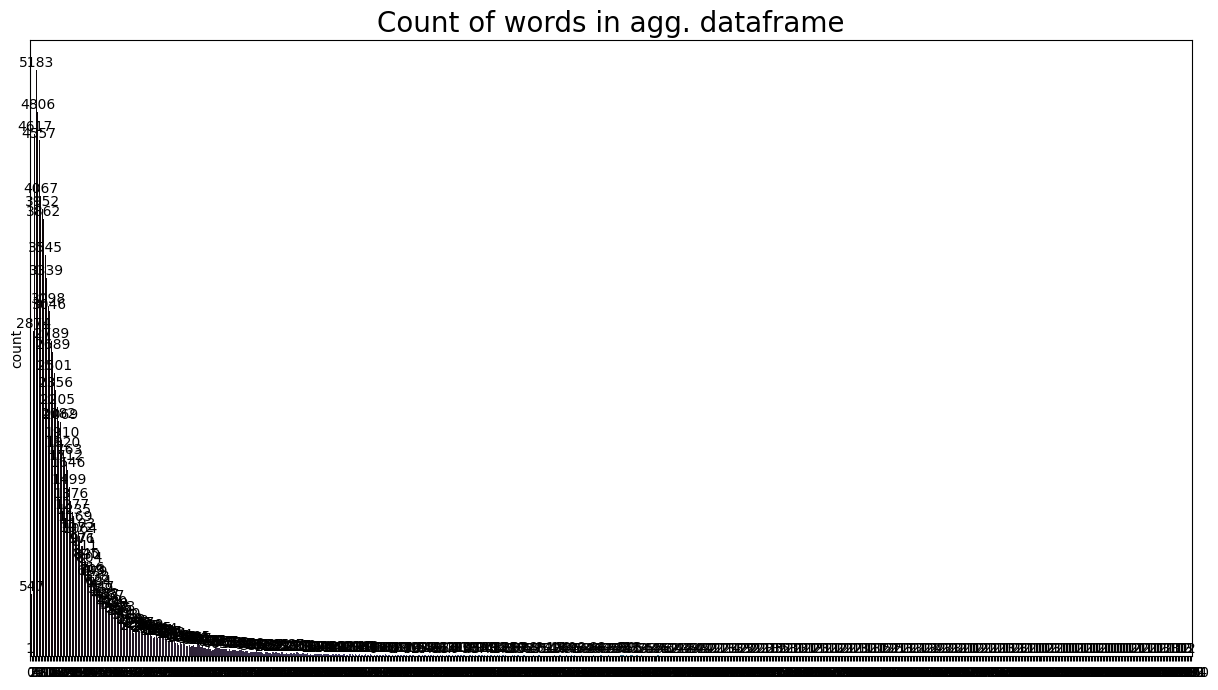

In [349]:
# Plotting agg_df
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=agg_df, palette='mako')
plt.title('Count of words in agg. dataframe', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

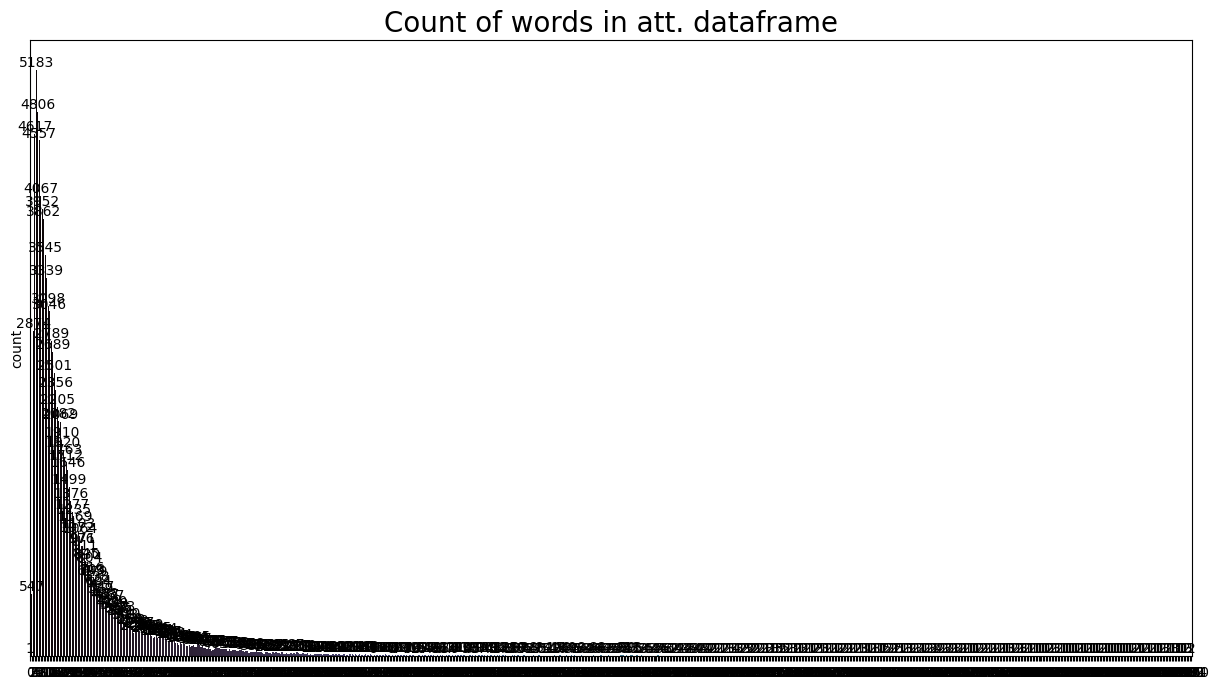

In [350]:
# Plotting att_df
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=att_df, palette='mako')
plt.title('Count of words in att. dataframe', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

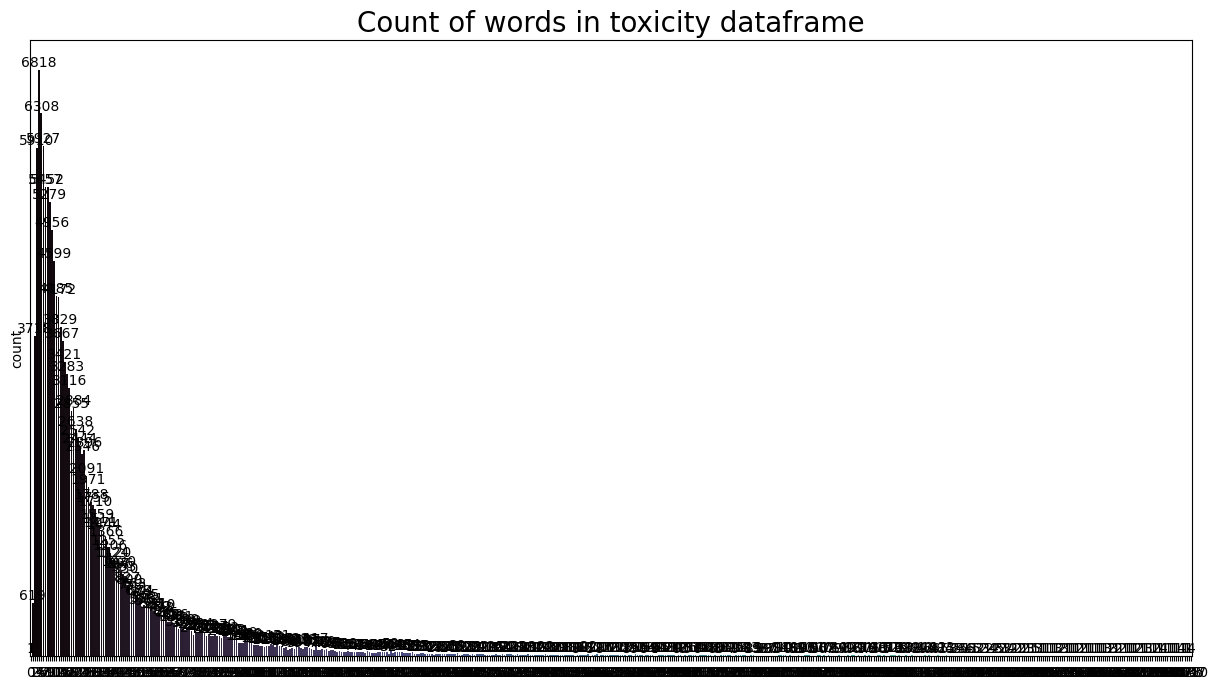

In [351]:
# Plotting tox_df
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=tox_df, palette='mako')
plt.title('Count of words in toxicity dataframe', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

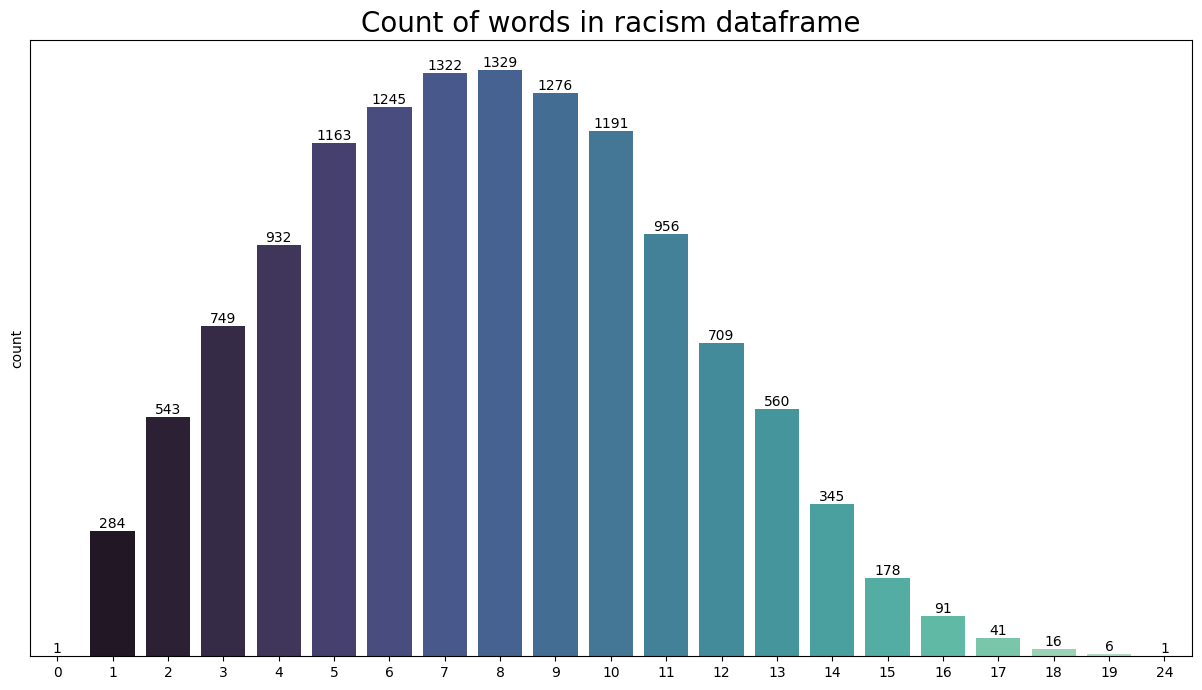

In [352]:
# Plotting rac_df
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=rac_df, palette='mako')
plt.title('Count of words in racism dataframe', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

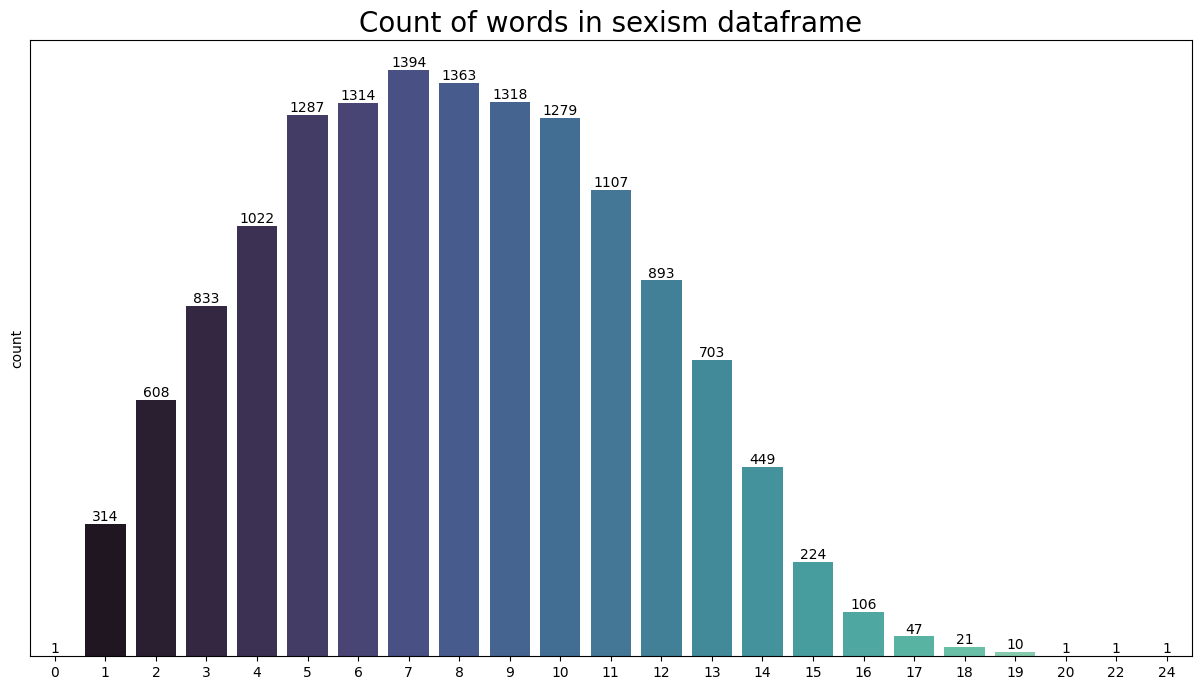

In [353]:
# Plotting sex_df
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=sex_df, palette='mako')
plt.title('Count of words in sexism dataframe', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [354]:
# Removing text without words
agg_df = agg_df[agg_df['text_len']!=0]
att_df = att_df[att_df['text_len']!=0]
tox_df = tox_df[tox_df['text_len']!=0]
rac_df = rac_df[rac_df['text_len']!=0]
sex_df = sex_df[sex_df['text_len']!=0]

## Machine Learning
### Data Preparation for multiple Models

In [355]:
agg_df.head()

,Text,Prob_not_aggression,Prob_aggression,aggression,tokenized_text,token_list,text_len
0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0,creativ dictionari definit term insur ensur pr...,"[creativ, dictionari, definit, term, insur, en...",188
1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0,term standard model le npov think would prefer...,"[term, standard, model, le, npov, think, would...",63
2,"True or false, the situation as of March 200...",1.000000,0.000000,0,true fals situat march saudi propos land peac ...,"[true, fals, situat, march, saudi, propos, lan...",29
3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0,next mayb could work le condescend suggest rea...,"[next, mayb, could, work, le, condescend, sugg...",34
4,This page will need disambiguation.,1.000000,0.000000,0,page need disambigu,"[page, need, disambigu]",3


In [356]:
att_df.head()

,Text,Prob_not_attack,Prob_attack,attack,tokenized_text,token_list,text_len
0,`- This is not ``creative``. Those are the di...,1.000000,0.000000,0,creativ dictionari definit term insur ensur pr...,"[creativ, dictionari, definit, term, insur, en...",188
1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0,term standard model le npov think would prefer...,"[term, standard, model, le, npov, think, would...",63
2,"True or false, the situation as of March 200...",1.000000,0.000000,0,true fals situat march saudi propos land peac ...,"[true, fals, situat, march, saudi, propos, lan...",29
3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0,next mayb could work le condescend suggest rea...,"[next, mayb, could, work, le, condescend, sugg...",34
4,This page will need disambiguation.,1.000000,0.000000,0,page need disambigu,"[page, need, disambigu]",3


In [357]:
tox_df.head()

,Text,Prob_not_toxicity,Prob_toxicity,toxicity,tokenized_text,token_list,text_len
0,This: :One can make an analogy in mathematical...,0.9,0.1,0,one make analog mathemat term envis distribut ...,"[one, make, analog, mathemat, term, envis, dis...",58
1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0,clarif zundark right check wikipedia bug page ...,"[clarif, zundark, right, check, wikipedia, bug...",56
2,Elected or Electoral? JHK,1.0,0.0,0,elect elector jhk,"[elect, elector, jhk]",3
3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0,fun entri devotchka cowork korea could tell di...,"[fun, entri, devotchka, cowork, korea, could, ...",255
4,Please relate the ozone hole to increases in c...,0.8,0.2,0,plea relat ozon hole increas cancer provid fig...,"[plea, relat, ozon, hole, increas, cancer, pro...",20


In [358]:
rac_df.head()

,Text,racism,tokenized_text,token_list,text_len
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1,muslim mob violenc hindu bangladesh continu islam,"[muslim, mob, violenc, hindu, bangladesh, cont...",7
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1,islamophobia like idea naziphobia islam religi...,"[islamophobia, like, idea, naziphobia, islam, ...",9
3,"Finally I'm all caught up, and that sudden dea...",0,final caught sudden death cook look like gon n...,"[final, caught, sudden, death, cook, look, lik...",11
4,@carolinesinders @herecomesfran *hugs*,0,hug,[hug],1
5,"Please, PLEASE start using ""is your discernmen...",0,plea plea start use discern blunt steroid mean...,"[plea, plea, start, use, discern, blunt, stero...",10


In [359]:
sex_df.head()

,Text,sexism,tokenized_text,token_list,text_len
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,1,rt sexist fuck woman cook get shit togeth,"[rt, sexist, fuck, woman, cook, get, shit, tog...",8
1,There's some very hate able teams this year #MKR,0,hate abl team year mkr,"[hate, abl, team, year, mkr]",5
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",0,rt everyon underestim u still well underestim ...,"[rt, everyon, underestim, u, still, well, unde...",9
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,0,rt mkr actual check peopl could cook witb,"[rt, mkr, actual, check, peopl, could, cook, w...",8
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",1,thought realli funni joke promis sexist say,"[thought, realli, funni, joke, promis, sexist,...",7


## Building multiple models
1. Model 1: Predicting the probability of aggressiveness in the sentence.
*   Dataset: agg_df
*   Input: agg_x_1 = 'token_list', 'ed_label_0', 'ed_label'
*   Output: agg_y_1 = 'ed_label_1'



2. Model 2: Predicting whether the sentence has aggressive wording or not based only on the sentence.
*   Dataset: agg_df
*   Input: agg_x_2 = 'token_list'
*   Output: agg_y_2 = 'ed_label'



3. Model 3: Predicting the probability of attacking words in the sentence.
*   Dataset: att_df
*   Input: att_x_1 = 'token_list', 'ed_label_0', 'ed_label'
*   Output: att_y_1 = 'ed_label_1'



4. Model 4: Predicting whether the sentence has attacking wording or not based only on the sentence.
*   Dataset: att_df
*   Input: att_x_2 = 'token_list'
*   Output: att_y_2 = 'ed_label'



5. Model 5: Predicting the probability of toxic words in the sentence.
*   Dataset: tox_df
*   Input: tox_x_1 = 'token_list', 'ed_label_0', 'ed_label'
*   Output: tox_y_1 = 'ed_label_1'



6. Model 6: Predicting whether the sentence has toxic wording or not based only on the sentence.
*   Dataset: tox_df
*   Input: tox_x_2 = 'token_list'
*   Output: tox_y_2 = 'ed_label'



7. Model 7: Predicting whether the sentence has racist wording or not based only on the sentence.
*   Dataset: rac_df
*   Input: rac_x = 'token_list'
*   Output: rac_y = 'ed_label'



8. Model 8: Predicting whether the sentence has sexist wording or not based only on the sentence.
*   Dataset: sex_df
*   Input: sex_x = 'token_list'
*   Output: sex_y = 'ed_label'


### Splitting the datasets to train and test datasets

In [360]:
# Dropping unused columns from the datasets

agg_df
agg_df.drop(['text_len'], axis = 1, inplace = True)

# att_df
att_df.drop(['text_len'], axis = 1, inplace = True)

# tox_df
tox_df.drop(['text_len'], axis = 1, inplace = True)

# rac_df
rac_df.drop(['text_len'], axis = 1, inplace = True)

# sex_df
sex_df.drop(['text_len'], axis = 1, inplace = True)

In [361]:
# Renaming the columns of the datasets
agg_df = agg_df.rename({'ed_label_0':'Prob_not_aggression','ed_label_1':'Prob_aggression','oh_label':'aggression'},axis='columns')
att_df = att_df.rename({'ed_label_0':'Prob_not_attack','ed_label_1':'Prob_attack','oh_label':'attack'},axis='columns')
tox_df = tox_df.rename({'ed_label_0':'Prob_not_toxicity','ed_label_1':'Prob_toxicity','oh_label':'toxicity'},axis='columns')
rac_df = rac_df.rename({'oh_label':'racism'},axis='columns')
sex_df = sex_df.rename({'oh_label':'sexism'},axis='columns')

In [362]:
print(agg_df.head())
print(att_df.head())
print(tox_df.head())
print(rac_df.head())
print(sex_df.head())

                                                Text  Prob_not_aggression  \
0  `- This is not ``creative``.  Those are the di...             0.900000   
1  `  :: the term ``standard model`` is itself le...             1.000000   
2    True or false, the situation as of March 200...             1.000000   
3   Next, maybe you could work on being less cond...             0.555556   
4               This page will need disambiguation.              1.000000   

   Prob_aggression  aggression  \
0         0.100000           0   
1         0.000000           0   
2         0.000000           0   
3         0.444444           0   
4         0.000000           0   

                                      tokenized_text  \
0  creativ dictionari definit term insur ensur pr...   
1  term standard model le npov think would prefer...   
2  true fals situat march saudi propos land peac ...   
3  next mayb could work le condescend suggest rea...   
4                                page need disambigu

In [363]:
# Re-indexing the columns for all the datasets
# agg_df = agg_df.reindex(columns=['Text', 'tokenized_text', 'token_list', 'Prob_not_aggression', 'Prob_aggression', 'aggression'])
# att_df = att_df.reindex(columns=['Text', 'tokenized_text', 'token_list', 'Prob_not_attack', 'Prob_attack', 'attack'])
# tox_df = tox_df.reindex(columns=['Text', 'tokenized_text', 'token_list', 'Prob_not_toxicity', 'Prob_toxicity', 'toxicity'])
# rac_df = rac_df.reindex(columns=['Text', 'tokenized_text', 'token_list', 'racism'])
# sex_df = sex_df.reindex(columns=['Text', 'tokenized_text', 'token_list', 'sexism'])

In [364]:
# # Splitting datasets into target (y) and predictor (x) variables
# # Model 1
# agg_x_1 = agg_df[['token_list', 'Prob_not_aggression','aggression']]
# agg_y_1 = agg_df[['Prob_aggression']]

# # Model 2
# agg_x_2 = agg_df[['token_list']]
# agg_y_2 = agg_df[['aggression']]

# # Model 3
# att_x_1 = att_df[['token_list', 'Prob_not_attack','attack']]
# att_y_1 = att_df[['Prob_attack']]

# # Model 4
# att_x_2 = att_df[['token_list']]
# att_y_2 = att_df[['attack']]

# # Model 5
# tox_x_1 = tox_df[['token_list', 'Prob_not_toxicity','toxicity']]
# tox_y_1 = tox_df[['Prob_toxicity']]

# # Model 6
# tox_x_2 = tox_df[['token_list']]
# tox_y_2 = tox_df[['toxicity']]

# # Model 7
# rac_x_1 = rac_df[['token_list']]
# rac_y_1 = rac_df[['racism']]

# # Model 8
# sex_x_1 = sex_df[['token_list']]
# sex_y_1 = sex_df[['sexism']]

In [365]:
# Splitting datasets into target (y) and predictor (x) variables
# Model 1
agg_x_1 = agg_df[['tokenized_text', 'Prob_not_aggression','aggression']]
agg_y_1 = agg_df[['Prob_aggression']]

# Model 2
agg_x_2 = agg_df[['tokenized_text']]
agg_y_2 = agg_df[['aggression']]

# Model 3
att_x_1 = att_df[['tokenized_text', 'Prob_not_attack','attack']]
att_y_1 = att_df[['Prob_attack']]

# Model 4
att_x_2 = att_df[['tokenized_text']]
att_y_2 = att_df[['attack']]

# Model 5
tox_x_1 = tox_df[['tokenized_text', 'Prob_not_toxicity','toxicity']]
tox_y_1 = tox_df[['Prob_toxicity']]

# Model 6
tox_x_2 = tox_df[['tokenized_text']]
tox_y_2 = tox_df[['toxicity']]

# Model 7
rac_x_1 = rac_df[['tokenized_text']]
rac_y_1 = rac_df[['racism']]

# Model 8
sex_x_1 = sex_df[['tokenized_text']]
sex_y_1 = sex_df[['sexism']]

In [400]:
agg_x_2.shape

(113923, 1)

In [367]:
# Model 1: Splitting the train and test dataset for agg_df
agg_x_train_1, agg_x_test_1, agg_y_train_1, agg_y_test_1 = train_test_split(agg_x_1, agg_y_1, test_size = 0.3, random_state = 143)
print(agg_x_train_1.shape, agg_y_train_1.shape, agg_x_test_1.shape, agg_y_test_1.shape)

(79746, 3) (79746, 1) (34177, 3) (34177, 1)


In [368]:
# Model 2: Splitting the train and test dataset for agg_df
agg_x_train_2, agg_x_test_2, agg_y_train_2, agg_y_test_2 = train_test_split(agg_x_2, agg_y_2, test_size = 0.3, random_state = 143)
print(agg_x_train_2.shape, agg_y_train_2.shape, agg_x_test_2.shape, agg_y_test_2.shape)

(79746, 1) (79746, 1) (34177, 1) (34177, 1)


In [369]:
# Model 3: Splitting the train and test dataset for att_df
att_x_train_1, att_x_test_1, att_y_train_1, att_y_test_1 = train_test_split(att_x_1, att_y_1, test_size = 0.3, random_state = 143)
print(att_x_train_1.shape, att_y_train_1.shape, att_x_test_1.shape, att_y_test_1.shape)

(79746, 3) (79746, 1) (34177, 3) (34177, 1)


In [370]:
# Model 4: Splitting the train and test dataset for att_df
att_x_train_2, att_x_test_2, att_y_train_2, att_y_test_2 = train_test_split(att_x_2, att_y_2, test_size = 0.3, random_state = 143)
print(att_x_train_2.shape, att_y_train_2.shape, att_x_test_2.shape, att_y_test_2.shape)

(79746, 1) (79746, 1) (34177, 1) (34177, 1)


In [371]:
# Model 5: Splitting the train and test dataset for tox_df
tox_x_train_1, tox_x_test_1, tox_y_train_1, tox_y_test_1 = train_test_split(tox_x_1, tox_y_1, test_size = 0.3, random_state = 143)
print(tox_x_train_1.shape, tox_y_train_1.shape, tox_x_test_1.shape, tox_y_test_1.shape)

(109585, 3) (109585, 1) (46965, 3) (46965, 1)


In [372]:
# Model 6: Splitting the train and test dataset for tox_df
tox_x_train_2, tox_x_test_2, tox_y_train_2, tox_y_test_2 = train_test_split(tox_x_2, tox_y_2, test_size = 0.3, random_state = 143)
print(tox_x_train_2.shape, tox_y_train_2.shape, tox_x_test_2.shape, tox_y_test_2.shape)

(109585, 1) (109585, 1) (46965, 1) (46965, 1)


In [373]:
# Model 7: Splitting the train and test dataset for rac_df
rac_x_train_1, rac_x_test_1, rac_y_train_1, rac_y_test_1 = train_test_split(rac_x_1, rac_y_1, test_size = 0.3, random_state = 143)
print(rac_x_train_1.shape, rac_y_train_1.shape, rac_x_test_1.shape, rac_y_test_1.shape)

(9055, 1) (9055, 1) (3882, 1) (3882, 1)


In [374]:
# Model 8: Splitting the train and test dataset for sex_df
sex_x_train_1, sex_x_test_1, sex_y_train_1, sex_y_test_1 = train_test_split(sex_x_1, sex_y_1, test_size = 0.3, random_state = 143)
print(sex_x_train_1.shape, sex_y_train_1.shape, sex_x_test_1.shape, sex_y_test_1.shape)

(10006, 1) (10006, 1) (4289, 1) (4289, 1)


## Tf-IDF Vectorization

In [375]:
# Instantiating the vectorizer
tf_idf = TfidfVectorizer()

# Model 1
agg_x_train_tf_1 = tf_idf.fit_transform(agg_x_train_1)
agg_x_test_tf_1 = tf_idf.transform(agg_x_test_1)
print(agg_x_train_tf_1.shape)
print(agg_x_test_tf_1.shape)

(3, 3)
(3, 3)


In [376]:
# Model 2
agg_x_train_tf_2 = tf_idf.fit_transform(agg_x_train_2)
agg_x_test_tf_2 = tf_idf.transform(agg_x_test_2)
print(agg_x_train_tf_2.shape)
print(agg_x_test_tf_2.shape)

(1, 1)
(1, 1)


In [377]:
# Model 3
att_x_train_tf_1 = tf_idf.fit_transform(att_x_train_1)
att_x_test_tf_1 = tf_idf.transform(att_x_test_1)
print(att_x_train_tf_1.shape)
print(att_x_test_tf_1.shape)

(3, 3)
(3, 3)


In [378]:
# Model 4
att_x_train_tf_2 = tf_idf.fit_transform(att_x_train_2)
att_x_test_tf_2 = tf_idf.transform(att_x_test_2)
print(att_x_train_tf_2.shape)
print(att_x_test_tf_2.shape)

(1, 1)
(1, 1)


In [379]:
# Model 5
tox_x_train_tf_1 = tf_idf.fit_transform(tox_x_train_1)
tox_x_test_tf_1 = tf_idf.transform(tox_x_test_1)
print(tox_x_train_tf_1.shape)
print(tox_x_test_tf_1.shape)

(3, 3)
(3, 3)


In [380]:
# Model 6
tox_x_train_tf_2 = tf_idf.fit_transform(tox_x_train_2)
tox_x_test_tf_2 = tf_idf.transform(tox_x_test_2)
print(tox_x_train_tf_2.shape)
print(tox_x_test_tf_2.shape)

(1, 1)
(1, 1)


In [381]:
# Model 7
rac_x_train_tf = tf_idf.fit_transform(rac_x_train_1)
rac_x_test_tf = tf_idf.transform(rac_x_test_1)
print(rac_x_train_tf.shape)
print(rac_x_test_tf.shape)

(1, 1)
(1, 1)


In [382]:
# Model 8
sex_x_train_tf = tf_idf.fit_transform(sex_x_train_1)
sex_x_test_tf = tf_idf.transform(sex_x_test_1)
print(sex_x_train_tf.shape)
print(sex_x_test_tf.shape)

(1, 1)
(1, 1)


In [383]:
agg_y_train_1_array = agg_y_train_1.to_numpy().reshape((-1,1))
agg_y_train_1_array_1.shape

(79746, 1)

## Model Developement

#### Model 1, 3 & 5: Prediction of score, so models to be developed are:
1.   Linear regression
2.   Support Vector Machines
3.   Random Forests
4.   XGBoost

#### Model 2,4,6,7 & 8: Classification, so the models to be developed are:
1.   Logistic regression
2.   Support Vector Machines
3.   Random Forests
4.   XGBoost

#### Model 1

1.   Model 1a. Linear regression
2.   Model 1b. Support Vector Machines
3.   Model 1c. Random Forests
4.   Model 1d. XGBoost

#### Model 2

1.   Model 2a. Logistic regression
2.   Model 2b. Support Vector Machines
3.   Model 2c. Random Forests
4.   Model 2d. XGBoost

#### Model 3

1.   Model 3a. Linear regression
2.   Model 3b. Support Vector Machines
3.   Model 3c. Random Forests
4.   Model 3d. XGBoost

#### Model 4

1.   Model 4a. Logistic regression
2.   Model 4b. Support Vector Machines
3.   Model 4c. Random Forests
4.   Model 4d. XGBoost

#### Model 5

1.   Model 5a. Linear regression
2.   Model 5b. Support Vector Machines
3.   Model 5c. Random Forests
4.   Model 5d. XGBoost

#### Model 6

1.   Model 6a. Logistic regression
2.   Model 6b. Support Vector Machines
3.   Model 6c. Random Forests
4.   Model 6d. XGBoost

#### Model 7

1.   Model 7a. Logistic regression
2.   Model 7b. Support Vector Machines
3.   Model 7c. Random Forests
4.   Model 7d. XGBoost


#### Model 8

1.   Model 8a. Logistic regression
2.   Model 8b. Support Vector Machines
3.   Model 8c. Random Forests
4.   Model 8d. XGBoost




## Model 1

### 1a. Linear Regression

In [384]:
print(agg_x_train_tf_1_array)
print(agg_y_train_1_array)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[0.4       ]
 [0.22222222]
 [0.1       ]
 ...
 [1.        ]
 [0.1       ]
 [0.        ]]


In [389]:
agg_x_train_1_array = agg_x_train_1.to_numpy()
agg_y_train_1_array = agg_y_train_1.to_numpy()
print(agg_y_train_1_array)

[[0.4       ]
 [0.22222222]
 [0.1       ]
 ...
 [1.        ]
 [0.1       ]
 [0.        ]]


In [392]:
# Instantiating the Linear Regression
lin_reg = LinearRegression()

In [396]:
lin_reg.fit(agg_x_train_1, agg_y_train_1)
lin_reg.fit(agg_x_train_1[['tokenized_text','num_stops','distance_price']],df_omega['price'])

ValueError: ignored

In [387]:
# Linear Regression Cross Validation
print(agg_x_train_tf_1_array.shape)
print(agg_y_train_1_array.shape)
lin_cv_score = cross_val_score(lin_reg,agg_x_train_tf_1_array,agg_y_train_1_array,cv=5,scoring='f1_macro',n_jobs=-1)

(3, 3)
(79746, 1)


ValueError: ignored

In [ ]:
# Mean Linear Regression Cross Validation
mean_lin_cv = np.mean(lin_cv_score)
mean_lin_cv

### 1b. Support Vector Machines - Regressor

In [ ]:
# Instantiating the Support Vector Regressor
lin_svr = LinearSVR()

In [ ]:
# Cross Validation - SVR
lin_svr_cv_score = cross_val_score(lin_svr,agg_x_train_tf_1,agg_y_train_1,cv=5,scoring='f1_macro',n_jobs=-1)
mean_lin_svr_cv = np.mean(lin_svr_cv_score)
mean_lin_svr_cv

### 1c. Random Forests - Regressor

### 1d. XGBoost - Regressor